In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
import gc
import numpy as np

In [2]:
# # df1 = pd.read_csv("c:\\data\\e-commerce\\2019-Oct.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
# df = pd.read_csv("c:\\data\\e-commerce\\2019-Nov.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
# # df = pd.concat([df1, df2])
# # del df1, df2
# # gc.collect()
# df.head(2)

In [3]:
# display(df['brand'].nunique())
# display(df['category_code'].nunique())

In [4]:
# display(df['category_code'].isnull().sum())
# display(len(df))

In [5]:
# df['category_code'] = df['category_code'].astype('category')
# df['category_code'] = df['category_code'].cat.add_categories('unknown.')
# df['category_code'].fillna('unknown.', inplace=True)

# df['general_category'] = df['category_code'].apply(lambda x: x.split('.')[0])
# display(df.head(2))

In [6]:
# df['user_session'] = df['user_session'].astype('category').cat.codes
# df.head()

In [7]:
# # datetime 처리
# df['event_time'] = pd.to_datetime(df['event_time'])
# df['date'] = df['event_time'].dt.date

# # 사용자별, 시간순 정렬
# df = df.sort_values(['user_id', 'event_time'])

# # 구매 발생 플래그
# df['is_purchase'] = df['event_type'] == 'purchase'

# # 하루 단위 기준 세션 초기화
# df['daily_session'] = df['user_id'].astype(str) + '_' + df['date'].astype(str)

# # 구매 발생 시 세션 쪼개기: 구매 이후는 새로운 세션으로
# def split_on_purchase(group):
#     session_id = []
#     counter = 0
#     for is_p in group['is_purchase']:
#         session_id.append(counter)
#         if is_p:
#             counter += 1
#     return session_id

# # 사용자 + 날짜별로 쪼개서 세션 나누기
# df['session_split_id'] = df.groupby(['user_id', 'date']).apply(split_on_purchase).explode().values

# df['custom_session'] = (
#     df['user_id'].astype(str) + '_' +
#     df['date'].astype(str) + '_' +
#     df['session_split_id'].astype(str)
# )
# df.head(2)

In [8]:
# df1.to_csv("c:\\data\\e-commerce\\custom_session.csv", index=False) # event_time, event_type, product_id, category_code, brand, price, user_id, user_session, general_category, date, is_purchase, daily_session, session_split_id, custom_session
# df2.to_csv("c:\\data\\e-commerce\\custom_session_2.csv", index=False)

In [9]:
# df1 = pd.read_csv("c:\\data\\e-commerce\\custom_session.csv", usecols=['event_time', 'event_type', 'product_id', 'category_code', 'brand', 'price', 'user_id', 'general_category', 'custom_session'])
# df2 = pd.read_csv("c:\\data\\e-commerce\\custom_session_sample.csv", usecols=['event_time', 'event_type', 'product_id', 'category_code', 'brand', 'price', 'user_id', 'general_category', 'custom_session'])
# display(df1.head(2))
# display(df2.head(2))

In [10]:
# real_final_custom_session = pd.concat([df1, df2])
# len(real_final_custom_session)
# real_final_custom_session.to_csv("c:\\data\\e-commerce\\real_final_custom_session.csv", index=False)

In [ ]:
# custom_session = pd.read_csv("c:\\data\\e-commerce\\custom_session.csv")
# custom_session.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,custom_session,buy
0,2019-11-11 05:41:18+00:00,view,17301868,unknown.,sheba,144.14,138340325,unknown,138340325_2019-11-11_0,1
1,2019-11-11 05:42:24+00:00,view,17300771,unknown.,bulgari,57.72,138340325,unknown,138340325_2019-11-11_0,1


In [ ]:
# buy_sessions = custom_session[custom_session['event_type'] == 'purchase']['custom_session'].unique()

# buy_log = custom_session[custom_session['custom_session'].isin(buy_sessions)]
# not_buy_log = custom_session[~custom_session['custom_session'].isin(buy_sessions)]
# custom_session['buy'] = custom_session['custom_session'].isin(buy_log['custom_session']).astype(int)
# custom_session.head(2)

In [2]:
custom_session = pd.read_csv("c:\\data\\e-commerce\\custom_session_sample_oct_nov.csv")
custom_session.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,custom_session,buy
0,2019-11-11 05:41:18+00:00,view,17301868,unknown.,sheba,144.14,138340325,unknown,138340325_2019-11-11_0,1
1,2019-11-11 05:42:24+00:00,view,17300771,unknown.,bulgari,57.72,138340325,unknown,138340325_2019-11-11_0,1


In [3]:
median_price_category = custom_session.groupby('general_category')['price'].median().to_dict()
custom_session['relative_price'] = custom_session['price'] / custom_session['general_category'].map(median_price_category)
custom_session.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,custom_session,buy,relative_price
0,2019-11-11 05:41:18+00:00,view,17301868,unknown.,sheba,144.14,138340325,unknown,138340325_2019-11-11_0,1,1.789225
1,2019-11-11 05:42:24+00:00,view,17300771,unknown.,bulgari,57.72,138340325,unknown,138340325_2019-11-11_0,1,0.716485


In [4]:
custom_session['custom_session'] = custom_session['custom_session'].astype('category').cat.codes
custom_session.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,custom_session,buy,relative_price
0,2019-11-11 05:41:18+00:00,view,17301868,unknown.,sheba,144.14,138340325,unknown,47,1,1.789225
1,2019-11-11 05:42:24+00:00,view,17300771,unknown.,bulgari,57.72,138340325,unknown,47,1,0.716485


In [5]:
def log_dictionary(df):
    df = df.sort_values(['user_id', 'event_time'])
    df['event_time'] = pd.to_datetime(df['event_time'])

    session_data = []

    for session, group in df.groupby('custom_session'):
        group = group.sort_values('event_time')

        times = group['event_time'].tolist()
        time_since_start = [(t - times[0]).total_seconds() for t in times]
        time_since_prev = [0] + [(times[i] - times[i-1]).total_seconds() for i in range(1, len(times))]

        events = []
        for _, row in group.iterrows():
            if row['event_type'] == 'purchase':
                continue  # 구매 제외
            
            events.append({
                "event_type": row["event_type"],
                "product_id": row["product_id"],
                "category_code": row["category_code"] if pd.notna(row["category_code"]) else "unknown.",
                "general_category": row["general_category"] if pd.notna(row["general_category"]) else "unknown",
                "brand": row["brand"] if pd.notna(row["brand"]) else "unknown",
                "price": row["price"],
                "relative_price": row["relative_price"],
                "time_since_start": time_since_start[len(events)],
                "time_since_prev": time_since_prev[len(events)]
            })

        session_data.append({
            "session": session,
            "event": events,
            "buy": int(group["buy"].max())
        })

    return pd.DataFrame(session_data)

In [6]:
log_dict = log_dictionary(custom_session)

KeyboardInterrupt: 

In [ ]:
# pd.set_option("display.max_colwidth", None)
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None) 

pd.reset_option("display.max_colwidth")
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

In [ ]:
display(log_dict.head(3))

,session,event,buy
0,0,"[{'event_type': 'view', 'product_id': 31501001...",0
1,1,"[{'event_type': 'view', 'product_id': 4700199,...",0
2,2,"[{'event_type': 'view', 'product_id': 4700419,...",0


In [ ]:
def category_code(events):
    for event in events:
        if event['category_code'] == 'unknown.':
            event['category_code'] = 'unknown'
    return events
log_dict['event'] = log_dict['event'].apply(category_code)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_event = LabelEncoder()
le_event.fit(custom_session['event_type'].unique())
le_event.classes_

array(['cart', 'purchase', 'view'], dtype=object)

In [ ]:
def encode_event_type(events):
    for event in events:
        event['event_type'] = le_event.transform([event['event_type']])[0]
    return events

log_dict['event'] = log_dict['event'].apply(encode_event_type)

In [ ]:
log_dict.head(2)

,session,event,buy
0,0,"[{'event_type': 2, 'product_id': 31501001, 'ca...",0
1,1,"[{'event_type': 2, 'product_id': 4700199, 'cat...",0


In [ ]:
df = log_dict.copy()

In [ ]:
# 전체 파이프라인: 데이터 파싱 -> vocabs -> tf.data -> Transformer 모델 -> 학습
import ast
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1) 파싱
# columns = ['session', 'event', 'buy']
# event 컬럼은 문자열화된 리스트(예: "[{...}, {...}]")
# parse if string
def parse_events(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            try:
                return json.loads(x)
            except Exception:
                return []
    elif isinstance(x, list):
        return x
    else:
        return []

df['events_parsed'] = df['event'].apply(parse_events)

# quick inspect
print("n_sessions:", len(df))
print("example session events:", df['events_parsed'].iloc[0])

n_sessions: 1876387
example session events: [{'event_type': np.int64(2), 'product_id': 31501001, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'unknown', 'price': 256.53, 'relative_price': 3.3220668220668217, 'time_since_start': 0.0, 'time_since_prev': 0}, {'event_type': np.int64(2), 'product_id': 2500141, 'category_code': 'appliances.kitchen.oven', 'general_category': 'appliances', 'brand': 'samsung', 'price': 476.12, 'relative_price': 3.4260631791034037, 'time_since_start': 223.0, 'time_since_prev': 223.0}, {'event_type': np.int64(2), 'product_id': 2501450, 'category_code': 'appliances.kitchen.oven', 'general_category': 'appliances', 'brand': 'samsung', 'price': 450.44, 'relative_price': 3.241275095344319, 'time_since_start': 286.0, 'time_since_prev': 63.0}, {'event_type': np.int64(2), 'product_id': 2501450, 'category_code': 'appliances.kitchen.oven', 'general_category': 'appliances', 'brand': 'samsung', 'price': 450.44, 'relative_price': 3.241275095344319, 'tim

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['buy'])

In [ ]:
# 2) Extract features per event and build vocabs for categorical fields
cat_fields = ['event_type', 'category_code', 'general_category', 'brand']
num_fields = ['price', 'relative_price', 'time_since_start', 'time_since_prev']

# Flatten to collect uniques
from collections import Counter, defaultdict
counters = {f: Counter() for f in cat_fields}
sess_lengths = []

for ev_list in train_df['events_parsed']: # train_df 기준의 vocab
    sess_lengths.append(len(ev_list))
    for ev in ev_list:
        for f in cat_fields:
            val = ev.get(f, 'unknown')
            # unify missing / weird strings
            if val is None or (isinstance(val, float) and np.isnan(val)):
                val = 'unknown'
            counters[f][str(val)] += 1

# Show top uniques
for f in cat_fields:
    print(f, "unique:", len(counters[f]), "top:", counters[f].most_common(5))

# decide vocab sizes (example)
VOCAB_SIZES = {
    'event_type': None,       # leave full if small
    'category_code': 200,    # keep top-2000 or so
    'general_category': None,
    'brand': 3000
}

def build_vocab(counter, max_size=None, min_freq=1, add_oov=True):
    items = [k for k, v in counter.items() if v >= min_freq]
    items_sorted = sorted(items, key=lambda x: counter[x], reverse=True)
    if max_size:
        items_sorted = items_sorted[:max_size]
    vocab = {v: i+1 for i, v in enumerate(items_sorted)}  # reserve 0 for PAD
    if add_oov:
        vocab['<OOV>'] = len(vocab) + 1
    return vocab

vocab = {}
for f in cat_fields:
    vocab[f] = build_vocab(counters[f], max_size=VOCAB_SIZES.get(f, None))
    print(f, 'vocab_size:', len(vocab[f]))

event_type unique: 2 top: [('2', 11715369), ('0', 1381514)]
category_code unique: 128 top: [('unknown', 4143694), ('electronics.smartphone', 3456686), ('electronics.video.tv', 435303), ('electronics.clocks', 388767), ('computers.notebook', 388299)]
general_category unique: 14 top: [('electronics', 4932726), ('unknown', 4143694), ('appliances', 1747228), ('computers', 736520), ('apparel', 503637)]
brand unique: 3950 top: [('samsung', 1741097), ('unknown', 1658327), ('apple', 1315083), ('xiaomi', 905921), ('huawei', 284147)]
event_type vocab_size: 3
category_code vocab_size: 129
general_category vocab_size: 15
brand vocab_size: 3001


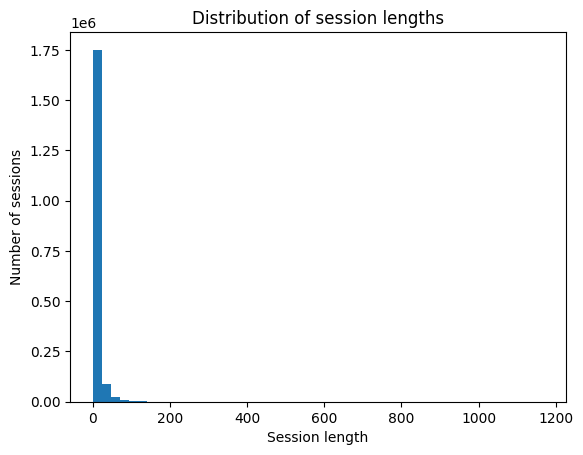

In [ ]:
import matplotlib.pyplot as plt

session_lengths = [len(ev) for ev in df['events_parsed']]

plt.hist(session_lengths, bins=50)
plt.xlabel("Session length")
plt.ylabel("Number of sessions")
plt.title("Distribution of session lengths")
plt.show()

In [ ]:
lengths = np.array(session_lengths)
print(np.percentile(lengths, [50, 90, 95,97,98,98.5,99, 100]))


[   4.   18.   28.   37.   46.   52.   63. 1168.]


In [ ]:
# 3) Feature encoding utilities
MAX_SEQ_LEN = 32  # 128 -> 32 | percentile[50, 90, 95, 99, 100] = [  2.  11.  17.  40. 374.] 
def map_cat(value, vocab_map):
    if value is None:
        return vocab_map.get('<OOV>', 1)
    s = str(value)
    if s in vocab_map:
        return vocab_map[s]
    else:
        return vocab_map.get('<OOV>', 1)

# prepare numeric scaler: compute from flattened events
all_nums_train = {f: [] for f in num_fields} # train_df 기준
for ev_list in train_df['events_parsed']: # train_df 기준
    for ev in ev_list:
        for nf in num_fields:
            val = ev.get(nf, 0.0)
            if val is None:
                val = 0.0
            all_nums_train[nf].append(float(val)) # train_df 기준

scalers = {}
for nf in num_fields:
    scaler = StandardScaler()
    vals = np.array(all_nums_train[nf]).reshape(-1, 1) # train_df 기준
    scaler.fit(vals)
    scalers[nf] = scaler

In [ ]:
# 4) Convert each session to fixed tensors (padded/truncated)
def session_to_features(ev_list):
    seq_len = min(len(ev_list), MAX_SEQ_LEN)
    cat_indices = {f: np.zeros(MAX_SEQ_LEN, dtype=np.int32) for f in cat_fields}
    num_values = np.zeros((MAX_SEQ_LEN, len(num_fields)), dtype=np.float32)
    mask = np.zeros((MAX_SEQ_LEN,), dtype=np.float32)
    for i in range(seq_len):
        ev = ev_list[-seq_len+i] # max_seq_len 초과하는 세션은 뒤에서 자르기(if 0~100, max_seq_len=64 -> 36~100) 앞부터 자르려면 ev = ev_list[i]
        mask[i] = 1.0
        for f in cat_fields:
            cat_indices[f][i] = map_cat(ev.get(f, 'unknown'), vocab[f])
        # numeric
        for j, nf in enumerate(num_fields):
            val = ev.get(nf, 0.0)
            if val is None:
                val = 0.0
            # scale
            scaled = scalers[nf].transform(np.array([[float(val)]]))[0,0]
            num_values[i, j] = scaled
    return cat_indices, num_values, mask

# Example transform on first few sessions
sample = df['events_parsed'].iloc[0]
cat_idx, num_vals, mask = session_to_features(sample)
print({k: v.shape for k, v in cat_idx.items()}, num_vals.shape, mask.sum())

{'event_type': (32,), 'category_code': (32,), 'general_category': (32,), 'brand': (32,)} (32, 4) 4.0


In [ ]:
# 5) Build tf.data pipeline
def gen():
    for _, row in df.iterrows():
        cat_idx, num_vals, mask = session_to_features(row['events_parsed'])
        # combine categorical indices into a dict or stacked array
        # We'll return a dict for clarity
        features = {f: cat_idx[f] for f in cat_fields}
        features['numeric'] = num_vals
        features['mask'] = mask
        label = np.array([row['buy']], dtype=np.float32)
        yield features, label

# define output signature for tf.data
output_signature = (
    {
        **{f: tf.TensorSpec(shape=(MAX_SEQ_LEN,), dtype=tf.int32) for f in cat_fields},
        'numeric': tf.TensorSpec(shape=(MAX_SEQ_LEN, len(num_fields)), dtype=tf.float32),
        'mask': tf.TensorSpec(shape=(MAX_SEQ_LEN,), dtype=tf.float32)
    },
    tf.TensorSpec(shape=(1,), dtype=tf.float32)
)

dataset = tf.data.Dataset.from_generator(gen, output_signature=output_signature)
dataset = dataset.shuffle(2048).batch(64).prefetch(tf.data.AUTOTUNE)

def make_ds_from_df(df_sub):
    def gen_sub():
        for _, row in df_sub.iterrows():
            cat_idx, num_vals, mask = session_to_features(row['events_parsed'])
            features = {f: cat_idx[f] for f in cat_fields}
            features['numeric'] = num_vals
            features['mask'] = mask
            label = np.array([row['buy']], dtype=np.float32)
            yield features, label
    return tf.data.Dataset.from_generator(gen_sub, output_signature=output_signature).batch(64).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds_from_df(train_df)
val_ds = make_ds_from_df(val_df)

In [ ]:
# 6) Build Transformer-based model in Keras
# helper: create embedding layers for each categorical feature
EMBED_DIM = 32
cat_emb_layers = {}
for f in cat_fields:
    vocab_size = len(vocab[f]) + 1  # plus pad maybe
    cat_emb_layers[f] = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBED_DIM, mask_zero=True, name=f'emb_{f}')

# positional encoding (simple learned)
pos_emb = tf.keras.layers.Embedding(input_dim=MAX_SEQ_LEN, output_dim=EMBED_DIM, name='pos_emb')

class TransformerEncoderBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, mlp_dim, dropout=0.1, **kwargs): # add **kwargs for saving and loading model
        super().__init__(**kwargs) # add **kwargs for saving and loading model
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=dim)
        self.norm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(dropout)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(mlp_dim, activation='relu'),
            tf.keras.layers.Dense(dim),
        ])
        self.norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout2 = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask=None, training=False):
        # mask: [batch, seq_len] float mask -> convert to attention mask
        attn_mask = None
        if mask is not None:
            # MultiHeadAttention takes boolean mask where True means keep (opposite behavior), or attention_mask with shape [batch, seq_len]?
            # We'll create a 2D key mask: shape (batch, seq_len)
            # Keras MultiHeadAttention supports attention_mask (boolean) shape [batch, seq_len]
            attn_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.bool)  # shape (batch,1,seq_len)
            # attn_mask = ~attn_mask # keras | True -> (keep), False -> (mask)

        attn_out = self.mha(x, x, attention_mask=attn_mask)
        attn_out = self.dropout1(attn_out, training=training)
        out1 = self.norm1(x + attn_out)
        ff = self.ffn(out1)
        ff = self.dropout2(ff, training=training)
        out2 = self.norm2(out1 + ff)
        return out2

def build_model():
    # inputs
    inputs = {f: tf.keras.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name=f) for f in cat_fields}
    inputs['numeric'] = tf.keras.Input(shape=(MAX_SEQ_LEN, len(num_fields)), dtype=tf.float32, name='numeric')
    inputs['mask'] = tf.keras.Input(shape=(MAX_SEQ_LEN,), dtype=tf.float32, name='mask')

    # embed categorical and sum embeddings (or concat)
    emb_list = []
    for f in cat_fields:
        e = cat_emb_layers[f](inputs[f])  # (batch, seq, emb)
        emb_list.append(e)
        
    # project numeric features to embedding space
    numeric_proj = tf.keras.layers.Dense(EMBED_DIM)(inputs['numeric'])  # (batch, seq, emb)
    emb_list.append(numeric_proj)

    x = tf.keras.layers.Add()(emb_list)  # element-wise sum of embeddings
    # add position embedding
    positions = tf.range(start=0, limit=MAX_SEQ_LEN, delta=1)
    pos_embeddings = pos_emb(positions)
    x = x + pos_embeddings  # broadcast adds position to every batch

    # apply mask (pass to encoder blocks)
    mask = inputs['mask']

    # stack Transformer encoder blocks
    for _ in range(3):  # num encoder layers, tune as needed | 2 -> 4 x -> 3 o
        x = TransformerEncoderBlock(dim=EMBED_DIM, num_heads=4, mlp_dim=EMBED_DIM*4)(x, mask=mask)

    # pooling: use masked mean pooling
    mask_expanded = tf.keras.layers.Lambda(lambda m: tf.expand_dims(m, axis=-1))(mask)  # (batch, seq, 1)
    x_masked = tf.keras.layers.Multiply()([x, mask_expanded])
    sum_x = tf.keras.layers.Lambda(lambda z: tf.reduce_sum(z, axis=1))(x_masked)  # (batch, emb)
    lengths = tf.keras.layers.Lambda(lambda m: tf.reduce_sum(m, axis=1))(mask_expanded)  # (batch,1)
    pooled = tf.keras.layers.Lambda(lambda z: z[0] / (z[1] + 1e-6))([sum_x, lengths])
    
    # classifier head
    h = tf.keras.layers.Dense(64, activation='relu')(pooled)
    h = tf.keras.layers.Dropout(0.3)(h)
    out = tf.keras.layers.Dense(1, activation='sigmoid', name='buy_prob')(h)

    model = tf.keras.Model(inputs=inputs, outputs=out)
    return model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.BinaryAccuracy(name='acc')])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ event_type          │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_code       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ general_category    │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ brand (InputLayer)  │ (None, 32)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric             │ (None, 32, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emb_event_type      │ (None, 32, 32)    │        128 │ event_type[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emb_category_code   │ (None, 32, 32)    │      4,160 │ category_code[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emb_general_catego… │ (None, 32, 32)    │        512 │ general_category… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emb_brand           │ (None, 32, 32)    │     96,064 │ brand[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32, 32)    │        160 │ numeric[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32)    │          0 │ emb_event_type[0… │
│                     │                   │            │ emb_category_cod… │
│                     │                   │            │ emb_general_cate… │
│                     │                   │            │ emb_brand[0][0],  │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask (InputLayer)   │ (None, 32)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 32, 32)    │     25,280 │ add_1[0][0],      │
│ (TransformerEncode… │                   │            │ mask[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 32, 32)    │     25,280 │ transformer_enco… │
│ (TransformerEncode… │                   │            │ mask[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 32, 32)    │     25,280 │ transformer_enco… │
│ (TransformerEncode… │                   │            │ mask[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 32, 1)     │          0 │ mask[0][0]        │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 179,041 (699.38 KB)

 Trainable params: 179,041 (699.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7) Train
# Option: compute class weights if imbalanced
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

labels = train_df['buy'].values # df -> train_df
pos = labels.sum()
neg = len(labels) - pos
class_weight = {0: 1.0, 1: (neg / (pos + 1e-6))}  # simple balancing, 1e-6은 0으로 나누는 오류 방지용 아주 작은 수

early_stop = EarlyStopping(
    monitor='val_auc', # val_loss -> val_auc
    patience=3, # 개선 없으면 3 epoch 후 중단
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',  # best_model.h5 -> best_model.keras
    # WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

# fit
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, class_weight=class_weight, callbacks=[early_stop,checkpoint])

Epoch 1/20
26387/26387 ━━━━━━━━━━━━━━━━━━━━ 7555s 286ms/step - acc: 0.8816 - auc: 0.9147 - loss: 0.3483 - val_acc: 0.8891 - val_auc: 0.9270 - val_loss: 0.3165
Epoch 2/20
 1019/26387 ━━━━━━━━━━━━━━━━━━━━ 1:48:40 257ms/step - acc: 0.8863 - auc: 0.9203 - loss: 0.3339

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

threshold = 0.6
y_true = val_df['buy'].values
y_pred = (model.predict(val_ds) > threshold).astype(int).flatten()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

NameError: name 'val_df' is not defined

67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step


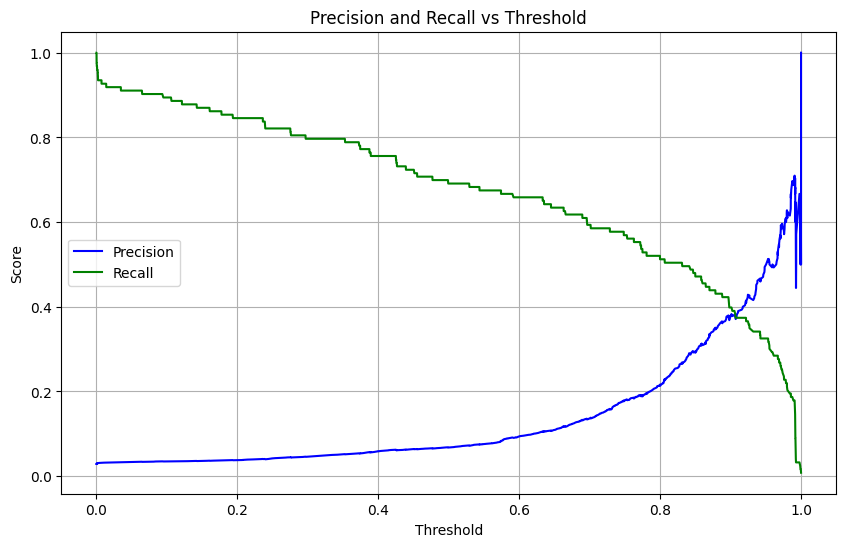

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 예측 확률
y_probs = model.predict(val_ds)  # ← val_ds는 y_true 포함되어 있어야 함
y_probs = y_probs.ravel()  # (n, 1) → (n,)

# precision, recall, threshold 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 8) Evaluate and inference
# example inference on raw session
def predict_session(model, ev_list):
    cat_idx, num_vals, mask = session_to_features(ev_list)
    feed = {f: np.expand_dims(cat_idx[f], 0) for f in cat_fields}
    feed['numeric'] = np.expand_dims(num_vals, 0)
    feed['mask'] = np.expand_dims(mask, 0)
    prob = model.predict(feed)[0,0]
    return prob 

In [ ]:
le_event.classes_

array(['cart', 'purchase', 'view'], dtype=object)

In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 30.0,
        "time_since_prev": 30.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
구매 확률: 0.6079


In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 14.0,
        "time_since_prev": 14.0
    },
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 27.0,
        "time_since_prev": 13.0
    },
    {
        "event_type": 1, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 28.0,
        "time_since_prev": 1.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
구매 확률: 0.5644


In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 14.0,
        "time_since_prev": 14.0
    },
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 27.0,
        "time_since_prev": 13.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
구매 확률: 0.5509


In [ ]:
print(log_dict.iloc[7]['event'])

[{'event_type': np.int64(2), 'product_id': 17301541, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'unknown', 'price': 162.17, 'relative_price': 1.8000888000887998, 'time_since_start': 0.0, 'time_since_prev': 0}, {'event_type': np.int64(2), 'product_id': 17301541, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'unknown', 'price': 162.17, 'relative_price': 1.8000888000887998, 'time_since_start': 25.0, 'time_since_prev': 25.0}]


In [ ]:
prob = predict_session(model, log_dict.iloc[7]['event'])
print(f"구매 확률: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
구매 확률: 0.6403


In [ ]:
len(log_dict)

42509

In [ ]:
import random
randlist = random.sample(range(len(log_dict)), 5)
randlist

[42460, 22024, 6672, 39289, 37661]

In [ ]:
for i  in randlist:
    prob = predict_session(model, log_dict.iloc[i]['event'])
    print(i)
    print(f"Index {i} 구매 확률: {prob:.4f}")
    print("-"*42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
42460
Index 42460 구매 확률: 0.9915
------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
22024
Index 22024 구매 확률: 0.5751
------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6672
Index 6672 구매 확률: 0.7339
------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
39289
Index 39289 구매 확률: 0.1195
------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
37661
Index 37661 구매 확률: 0.7468
------------------------------------------


In [ ]:
print(log_dict.iloc[17924]['event'])

[{'event_type': np.int64(2), 'product_id': 21407370, 'category_code': 'electronics.clocks', 'general_category': 'electronics', 'brand': 'casio', 'price': 162.17, 'relative_price': 0.642130271233419, 'time_since_start': 0.0, 'time_since_prev': 0}, {'event_type': np.int64(2), 'product_id': 21400403, 'category_code': 'electronics.clocks', 'general_category': 'electronics', 'brand': 'boccia', 'price': 87.52, 'relative_price': 0.34654523856662045, 'time_since_start': 312.0, 'time_since_prev': 312.0}]


In [ ]:
print(log_dict[log_dict['buy'] == 1]['session'])

88          88
89          89
236        236
443        443
446        446
447        447
448        448
746        746
1018      1018
1099      1099
1316      1316
1496      1496
1513      1513
1555      1555
1556      1556
1893      1893
2063      2063
2064      2064
2158      2158
2236      2236
2237      2237
2374      2374
2510      2510
2636      2636
2924      2924
2935      2935
3078      3078
3111      3111
3112      3112
3176      3176
3300      3300
3458      3458
3554      3554
3644      3644
3832      3832
3927      3927
3991      3991
3994      3994
3997      3997
4017      4017
4068      4068
4070      4070
4239      4239
4283      4283
4502      4502
4503      4503
4504      4504
4752      4752
4774      4774
4794      4794
5043      5043
5079      5079
5080      5080
5091      5091
5195      5195
5201      5201
5654      5654
5820      5820
5821      5821
5942      5942
5944      5944
6125      6125
6164      6164
6165      6165
6594      6594
6595      6595
6597      

In [ ]:
prob = predict_session(model, log_dict.iloc[42476]['event'])
print(f"구매 확률: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
구매 확률: 0.9530


## problems
1. StandardScaler을 학습 전체에서 fit함. -> data leakage 가능성 | 해결 
2. 모델 확장